<h1><center>基于 Numpy 的面向数组有限元编程技术</center></h1>
$$\quad$$
<h2><center>报告人: 魏华祎</center></h2>
$$\quad$$
<h2><center>湘潭大学数学与计算科学学院</center></h2>
$$\quad$$
<h2><center>weihuayi@xtu.edu.cn</center></h2>
$$\quad$$
<h2><center>2017.04.08</center></h2>

## 面向数组编程（Array-oriented programming)

面向数组编程的核心思想是基于**多维数组及其运算**来实现相关算法。


Users of computers and programming languages are often concerned primarily with the efficiency of execution of algorithms, and might, therefore, summarily dismiss many of
the algorithms presented here. Such dismissal would be short-sighted, since a clear statement of an algorithm can usually be used as a basis from which one may easily derive more efficient algorithm. --- **Kenneth E. Iverson (Notation as a tool of
    thought, 1979 ACM Turing Award Lecture)**

**注:**

肯尼斯·艾佛森（Kenneth E. Iverson，1920年12月17日-2004年10月19日）是一位计算机科学家，最重要的贡献是开发了APL。1979年他因对数学表达式和编程语言理论的贡献而得到图灵奖。

## 面向数组编程的优缺点

* **优点**:
    - 避免写冗长的循环, 编写代码速度更高
    - 代码简洁, 可读性更高
    - 编程的抽象层次更接近高等数学的运算过程
    - 可直接利用高效实现的数值代数软件包, 编写高效的代码
* **缺点**: 
    - 需要改变已有的标量化编程思维方式
    - 需要基于数组及其运算重构已有算法

### 支持面向数组编程的语言

面向数组编程的语言或软件包:
* APL
* J
* Fortran 90
* Matlab 
* Octave
* R
* Wolfram Language
* Python 中的 Numpy 扩展模块
* C++ 中基于算子重载的很多数值代数扩展包, 如 Armadillo 和 Blitz++
* ......


下面分别是以 C 和 Python 语言实现两个矩阵的相加的代码:


```C
// C 语言实现 两个矩阵相加的代码
for (i = 0; i < n; i++)
    for (j = 0; j < n; j++)
        a[i][j] += b[i][j];
```

```Python
# Python 中两个矩阵相加的代码
A += B
```

##  iFEM

加州大学的陈龙教授开发了 Matlab 面向数组的有限元软件包 iFEM (https://bitbucket.org/ifem/ifem/), 利用很少的代码, 可以写出高效有限元代码. 但 iFEM 的主要缺点是**面向过程**编写, 导致代码的重用性和扩展性不高, 使用起来还是比较困难的.


## FEALPy: Finite  Element Analysis Library in Python

为了克服 iFEM 中存在的问题, 我们最近开发了 Python 语言的有限元软件包 FEALPy（https://github.com/weihuayi/fealpy）。

选择 Python 的原因如下:

* 解释性语言，无需编译，易学易用。
* 精心设计的语言, 允许编写结构良好且可读性强的代码(we code what we think)。
* 支持面向对象软件开发模式，可用面向对象的方式组织有限元软件包，易重用、维护和扩展。
* 有庞大的用户社群，包括 NASA, ANL, Google 等国际知名的科研机构和公司都把 Python 做为高性能计算的主要开发语言之一。Python 的初学者和开发者很容易从社群中获得帮助和开发文档。
* 有丰富的科学计算基础软件包， 如：
    + NumPy:  http://numpy.scipy.org - Numerical Python，主要提供多维数组及相关运算功能。
    + SciPy:  http://www.scipy.org - Scientific Python，提供高效的优化、FFT,、稀疏矩阵等科学计算模块。
    + Matplotlib: http://www.matplotlib.org - Graphics library，提供成熟 2D 和 3D 画图软件功能。
* 对高性能计算有很好的支持，如MPI、OpenMP和CUDA等， 可直接在大型并行计算机上布署使用。
* 很容易用其它编译语言扩展Python，如 C/C++和Fortran。
* 开源免费。

但 Python 也有一些问题, 如:

* 开发环境不如 Matlab
* 没有实现所有在专业软件包中找到的算法

## FEALPy 的架构设计

![FEALPy 的架构设计](./figures/sa-crop.png)

## FEALPy 中已经实现的功能

* 基础的网格数据结构、算法和可视化功能，包括二维的三角形、四边形和多边形，三维的四面体、六面体和多面体网格的数据结构；
* 简单区域上的三角形网格生成算法，二维的界面拟合网格生成算法，曲面三角形网格生成；
* 三角形网格的二分法加密算法。
* 基于四叉树和八叉树的数据结构和加密粗化算法，在加密和粗化时，不再要求相邻叶子单元的层数之差最多为一层。
* 实现了三角形和四面体网格上的任意次Lagrange有限元空间;
* 多边形网格上的最低次虚单元空间;
* Laplace 方程的离散、边界条件处理与求解等功能模块

## 面向数组的有限元编程技术

有限元算法中的基本要素:

* 网格
* 有限元空间
    + 基函数的计算
    + 自由度的管理 
* 离散系统
    + 矩阵和向量的构造
    + 求解
* 可视化
* ......

## 网格

**目标:** 用 Numpy 中的数组来组织三角形网格中的数组结构.

网格是有限元算法的基础, 最少需要两个二维数组来存储网格的信息:

* 网格节点坐标数组 `point`:
    + $N\times 2$ 的二维数组
    + `point[i, 0]` 和 `point[i, 1]` 分别存储第 $i$ 个网格节点的 $x$ 和 $y$ 坐标
* 单元顶点编号数组 `cell`:
    + $NC\times 3$ 的二维数组
    + `cell[i, 0]`, `cell[i, 1]` 和 `cell[i, 2]` 分别存储第 $i$ 个单元三个顶点的全局编号(即 `point` 中的行号)

In [5]:
import numpy as np
node = np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0),
     (0.0, 1.0)], dtype=np.float)
cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)

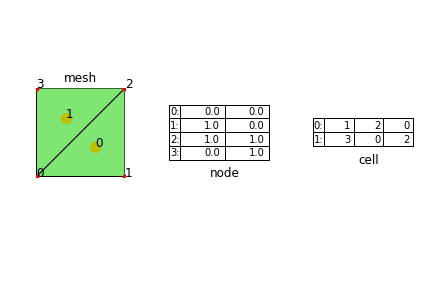

In [6]:
from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
tmesh = TriangleMesh(point, cell)
fig, axes = plt.subplots(1, 3)
tmesh.add_plot(axes[0])
tmesh.find_node(axes[0], showindex=True, markersize=25, fontsize=12)
tmesh.find_cell(axes[0], showindex=True, markersize=100, fontsize=12)
axes[0].set_title('mesh')

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[1].table(cellText=node, rowLabels=['0:', '1:', '2:', '3:'], loc='center')
axes[1].set_title('node', y=0.3)
axes[2].table(cellText=cell, rowLabels=['0:', '1:'], loc='center')
axes[2].set_title('cell', y=0.35)
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.savefig('/home/why/meshdata.pdf')
plt.show()


除了上述两个基本数组之外, 有限元方法中还需要更多的网格数据, 如:

* 边数组 `edge`
    + 二维 $NE\times 2$ 数组 
    + `edge[i, 0]` 和 `edge[i, 1]` 分别存储第 $i$ 条边的起点和终点的全局编号(即对应 `point` 数组中的行号)
    + 如果第 $i$ 条边是边界边, 则规定从 `edge[i, 0]` 看向 `edge[i, 1]`, 网格离散区域一定在左手边
* 边与单元的相邻关系数组 `edge2cell`
    + 二维 $NE \times 4 $ 的数组
    + `edge2cell[i, 0]` 和 `edge2cell[i, 1]` 分别存储第 $i$ 条边左右两个单元的全局编号(即对应 `cell` 数组中的行号)
    + `edge2cell[i, 2]` 和 `edge2cell[i, 3]` 分别存储第 $i$ 条边在左右两个单元中的局部编号
    + 如果是边界边, 则
        - `edge2cell[i, 0] = edge2cell[i, 1]` 
        - `edge2cell[i, 2] = edge2cell[i, 3]`
        
**注: `edge` 和 `edge2cell` 可以从 `cell` 中构造出来.**

###  `edge` 和 `edge2cell` 和构造算法

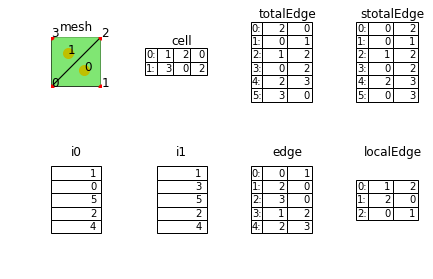

In [12]:
import numpy as np
from fealpy.mesh.mesh_tools import unique_row

node =np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0),
     (0.0, 1.0)], dtype=np.float)

cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)
localEdge = np.array(
    [(1, 2),
     (2, 0),
     (0, 1)], dtype=np.int)

totalEdge = cell[:, localEdge].reshape(-1, 2)
stotalEdge = np.sort(totalEdge, axis=1)
uedge, i0, j = unique_row(stotalEdge)
NE = i0.shape[0]

i1 = np.zeros(NE, dtype=np.int) 
NC = cell.shape[0]
i1[j] = np.arange(3*NC)

edge2cell = np.zeros((NE, 4), dtype=np.int)
t0 = i0//3
t1 = i1//3
k0 = i0%3
k1 = i1%3
edge2cell[:, 0] = t0
edge2cell[:, 1] = t1
edge2cell[:, 2] = k0
edge2cell[:, 3] = k1

edge = totalEdge[i0]

from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
tmesh = TriangleMesh(point, cell)
fig, axes = plt.subplots(2, 4)
tmesh.add_plot(axes[0, 0])
tmesh.find_node(axes[0, 0], showindex=True, markersize=25, fontsize=12)
tmesh.find_cell(axes[0, 0], showindex=True, markersize=100, fontsize=12)
axes[0, 0].set_title('mesh')

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[0, 1].table(cellText=cell, rowLabels=['0:', '1:'], loc='center')
axes[0, 1].set_title('cell', y=0.6)
axes[0, 2].table(cellText=totalEdge, rowLabels=['0:', '1:', '2:', '3:', '4:', '5:'], loc='center')
axes[0, 2].set_title('totalEdge', y=0.85)
axes[0, 3].table(cellText=np.sort(totalEdge, axis=1), rowLabels=['0:', '1:', '2:', '3:', '4:', '5:'], loc='center')
axes[0, 3].set_title('stotalEdge', y=0.85)
axes[1, 0].table(cellText=i0.reshape(-1,1),  loc='center')
axes[1, 0].set_title('i0', y=0.85)

axes[1, 1].table(cellText=i1.reshape(-1,1),  loc='center')
axes[1, 1].set_title('i1', y=0.85)

axes[1, 2].table(cellText=edge,  rowLabels=['0:', '1:', '2:', '3:', '4:'], loc='center')
axes[1, 2].set_title('edge', y=0.85)

axes[1, 3].table(cellText=localEdge,  rowLabels=['0:', '1:', '2:'], loc='center')
axes[1, 3].set_title('localEdge', y=0.85)

#axes[1, 1].table(cellText=i1.reshape(-1,1),  loc='center')
#axes[1, 1].set_title('i1', y=0.85)
#axes[1, 2].table(cellText=edge2cell,  rowLabels=['0:', '1:', '2:', '3:', '4:'], loc='center')
#axes[1, 2].set_title('edge2cell', y=0.85)
#axes[1, 3].table(cellText=edge,  rowLabels=['0:', '1:', '2:', '3:', '4:'], loc='center')
#axes[1, 3].set_title('edge', y=0.85)
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.savefig('/home/why/edgedata0.pdf')
plt.show()

下面给出网格的数据结构示意图：

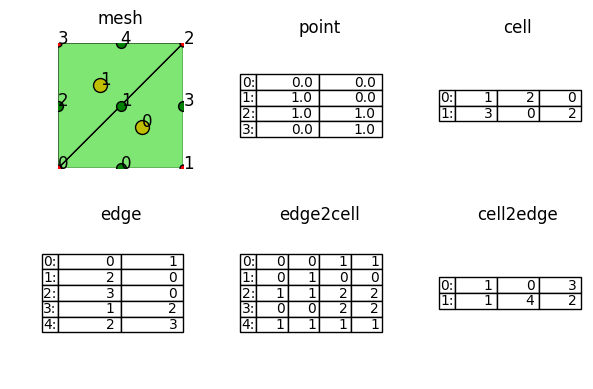

In [7]:
-

In [ ]:
axes[0, 0].set_title

## 3、任意 $p$ Lagrange 有限元空间

### 3.1 三角形单元上的重心坐标

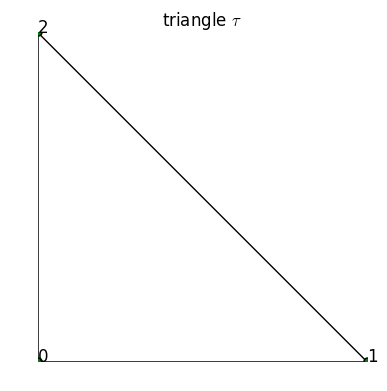

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh.TriangleMesh import TriangleMesh

#from matplotlib.font_manager import FontProperties
#cfont = FontProperties('SimHei')

point = np.array([
    [0,0],
    [1,0],
    [0,1]], dtype=np.float)
cell = np.array([[0, 1, 2]], dtype=np.int)

mesh = TriangleMesh(point, cell)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes, cellcolor='w')
mesh.find_point(axes, showindex=True, fontsize=12, color='g', markersize=25)
axes.set_title('triangle $\\tau$')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.savefig('/home/why/ppt/figures/triangle.pdf')
plt.show()

给定三角形单元 $\tau$, 其三个顶点 $\mathbf x_0 :=(x_0,y_0)$, $\mathbf x_1 :=(x_1,y_1)$ 和 $\mathbf x_2 :=(x_2,y_2)$ 逆时针排列, 且不在同一条直线上, 那么向量 $\vec{\mathbf x_0\mathbf x_1}$ 和 $\vec{\mathbf x_0\mathbf x_2}$ 是线性无关的. 这等价于矩阵

$$
A = 
\begin{pmatrix}
x_0 & x_1 & x_2 \\
y_0 & y_1 & y_2 \\
1   & 1   & 1 
\end{pmatrix}
$$

非奇异. 

任给一点 $\mathbf{x}:=(x,y)\in\tau$, 求解下面的线性方程组

$$
A 
\begin{pmatrix}
\lambda_0 \\
\lambda_1\\
\lambda_2  
\end{pmatrix}
=\begin{pmatrix}
x \\
y\\
1  
\end{pmatrix}
$$

可得唯一的一组解$\lambda_0,\lambda_1,\lambda_2$. 

因此对任意二维点 $\mathbf{x}\in\tau$, 有

$$
\mathbf{x}=\lambda_0(\mathbf{x})\mathbf{x}_0 + \lambda_1(\mathbf{x})\mathbf{x}_1 + \lambda_2(\mathbf{x})\mathbf{x}_2 
\text{ 且 } \lambda_0(\mathbf{x}) + \lambda_1(\mathbf{x}) + \lambda_2(\mathbf{x}) = 1. 
$$

$\lambda_0,\lambda_1,\lambda_2$ 称为点 $\mathbf{x}$ 关于点 $\mathbf{x}_0,\mathbf{x}_1$ 和$\mathbf{x}_2$ 的**重心坐标**. 

易知, $\lambda_0, \lambda_1, \lambda_2$ 都是关于 $\mathbf x$ 的线性函数, 且有

\begin{eqnarray*}
\lambda_0(\mathbf x_0) = 1,\quad & \lambda_0(\mathbf x_1) = 0,\quad& \lambda_0(\mathbf x_2) = 0\\
\lambda_1(\mathbf x_0) = 0,\quad & \lambda_1(\mathbf x_1) = 1,\quad& \lambda_1(\mathbf x_2) = 0\\
\lambda_2(\mathbf x_0) = 0,\quad & \lambda_2(\mathbf x_1) = 0,\quad & \lambda_2(\mathbf x_2) = 1\\
\end{eqnarray*}

$\lambda_0, \lambda_1, \lambda_2$ 关于 $\mathbf x$ 的梯度分别为:

$$
\begin{aligned}
\nabla\lambda_0 = \frac{1}{2|\tau|}(\mathbf x_2 - \mathbf x_1)W\\
\nabla\lambda_1 = \frac{1}{2|\tau|}(\mathbf x_0 - \mathbf x_2)W\\
\nabla\lambda_2 = \frac{1}{2|\tau|}(\mathbf x_1 - \mathbf x_0)W\\
\end{aligned}
$$

其中 

$$
W = \begin{pmatrix}
0 & 1\\ -1 & 0 
\end{pmatrix}
$$

**目标:** 

给定有 $NC$ 个三角形单元的网格, 计算所有单元上的 $\nabla \lambda_0$, $\nabla \lambda_1$ 和 $\nabla \lambda_2$.

这里需要一个三维数组来存储所有单元上的梯度. 

记三维数组为 $Dlambda$, 则 $Dlambda[i, j, k]$ 存储第 $i$ 个单元上的第 $j$ 个重心坐标的梯度的第 $k$ 个分量的值, 其中 $0 \leq i \leq NC-1$, $ 0 \leq j \leq 2$, $ 0 \leq k \leq 1$.

In [13]:
import numpy as np
point = np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0), 
     (0.0, 1.0)], dtype=np.float)
cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)
NC = cell.shape[0]
v0 = point[cell[:, 2], :] - point[cell[:, 1], :] # x_2 - x_1
v1 = point[cell[:, 0], :] - point[cell[:, 2], :] # x_0 - x_2
v2 = point[cell[:, 1], :] - point[cell[:, 0], :] # x_1 - x_0
nv = np.cross(v2, -v1)

Dlambda = np.zeros((NC, 3, 2), dtype=np.float)
length = nv
W = np.array([[0, 1], [-1, 0]], dtype=np.int)
Dlambda[:,0,:] = v0@W/length.reshape(-1, 1)
Dlambda[:,1,:] = v1@W/length.reshape(-1, 1)
Dlambda[:,2,:] = v2@W/length.reshape(-1, 1)
print('Dlambda:\n', Dlambda)

Dlambda:
 [[[ 1. -1.]
  [ 0.  1.]
  [-1.  0.]]

 [[-1.  1.]
  [ 0. -1.]
  [ 1.  0.]]]


### 3.2  三角形单元上的 $p$ 次基函数公式

给定三角形单元上的一个重心坐标 $(\lambda_0, \lambda_1, \lambda_2)$, 所有 $p\geq 1$ 次基函数的计算公式如下:

$$
\phi_{m,n,k} = \frac{p^p}{m!n!k!}\prod_{l_0 = 0}^{m - 1}
(\lambda_0 - \frac{l_0}{p}) \prod_{l_1 = 0}^{n-1}(\lambda_1 -
\frac{l_1}{p}) \prod_{l_2=0}^{k-1}(\lambda_2 - \frac{l_2}{p}).
$$

其中 $ m\geq 0$, $n\geq 0$, $ k \geq 0$, 且 $m+n+k=p$, 这里规定:

$$
 \prod_{l_i=0}^{-1}(\lambda_i - \frac{l_i}{p}) := 1,\quad i=0, 1, 2
$$

**注:**

三维情形的基函数表示如下:
$$
\phi_{m,n,k,v} = \frac{p^p}{m!n!k!v!}\prod_{l_0 = 0}^{m - 1}
(\lambda_0 - \frac{l_0}{p}) \prod_{l_1 = 0}^{n-1}(\lambda_1 -
\frac{l_1}{p}) \prod_{l_2=0}^{k-1}(\lambda_2 - \frac{l_2}{p})\prod_{l_3=0}^{v-1}(\lambda_3 - \frac{l_3}{p}).
$$


### 3.3 基函数的矩阵计算公式

**目标:**

给定重心坐标 $(\lambda_0, \lambda_1, \lambda_2)$, 利用**面向数组**的方式计算 $p$ 次元所有基函数在 $(\lambda_0, \lambda_1, \lambda_2)$ 处的**函数值**.

构造向量：
$$
P = ( \frac{1}{0!},  \frac{1}{1!}, \frac{1}{2!}, \cdots, \frac{1}{p!})
$$

构造矩阵：
$$
A :=                                                                            
\begin{pmatrix}  
1  &  1  & 1 \\
\lambda_0 & \lambda_1 & \lambda_2\\                                             
\lambda_0 - \frac{1}{p} & \lambda_1 - \frac{1}{p} & \lambda_2 - \frac{1}{p}\\   
\vdots & \vdots & \vdots \\                                                     
\lambda_0 - \frac{p - 1}{p} & \lambda_1 - \frac{p - 1}{p} & \lambda_2 - \frac{p - 1}{p}
\end{pmatrix}                                                                   
$$ 

对 $A$ 的每一列做累乘运算, 并左乘由 $P$ 形成的对角矩阵, 得矩阵:

$$
B = \mathrm{diag}(P)
\begin{pmatrix}
1 & 1 & 1 \\
\lambda_0 & \lambda_1 & \lambda_2\\
\prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) \\
\vdots & \vdots & \vdots \\
\prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) 
\end{pmatrix}
$$

易知, 只需从 $B$ 的每一列中各选择一项相乘(要求三项次数之和为 $p$), 再乘以 $p^p$ 即可得到相应的基函数, 其中取法共有 

$$
n_{dof} = {(p+1)(p+2)\over 2}
$$

即需要构造 $n_{dof}\times 3$ 的指标矩阵 $I$, 则基函数可写成如下形式 

$$
\phi_i = p^pB_{I_{i,0}, 0}B_{I_{i, 1},1}B_{I_{i, 2}, 2}, \quad i = 0, 1, \cdots, n_{dof}
$$

对应 `Python` 的代码如下:

```Python
phi = p**p*np.prod(B[I, [0, 1, 2]], axis=1)
```

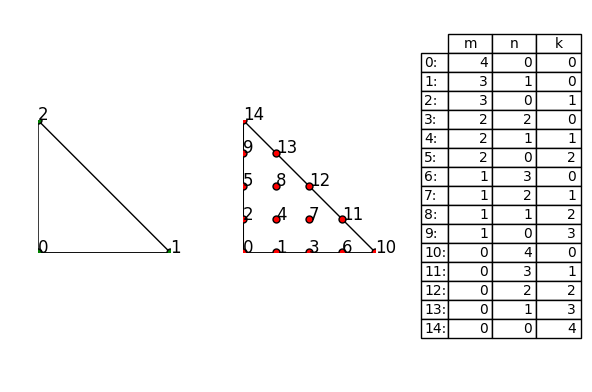

In [6]:
import sys

import numpy as np
import matplotlib.pyplot as plt

from fealpy.functionspace.tools import function_space
from fealpy.mesh.TriangleMesh import TriangleMesh

#from matplotlib.font_manager import FontProperties
#cfont = FontProperties('SimHei')

degree = 4

point = np.array([
    [0,0],
    [1,0],
    [0,1]], dtype=np.float)
cell = np.array([[0, 1, 2]], dtype=np.int)

mesh = TriangleMesh(point, cell)
V = function_space(mesh, 'Lagrange', degree)
ldof = V.number_of_local_dofs()
ipoints = V.interpolation_points()
cell2dof = V.cell_to_dof()
fig, axes = plt.subplots(1, 3)
mesh.add_plot(axes[0], cellcolor='w')
mesh.find_point(axes[0], showindex=True, fontsize=12, color='g', markersize=25)
#axes[0].set_title('local vertices indices', y=1)

mesh.add_plot(axes[1], cellcolor='w')
mesh.find_point(axes[1], point=ipoints[cell2dof[0]], showindex=True, fontsize=12, markersize=25)
#axes[1].set_title(str(degree) + ' dof indices', y=1)

axes[2].axis('tight')
axes[2].axis('off')
rl = [str(i)+":" for i in range(ldof)]
axes[2].table(cellText=V.cellIdx, rowLabels= rl, colLabels=['m', 'n', 'k'], loc='center')
#axes[2].set_title(str(degree) + 'index matrix $I$', y=1)
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.savefig('/home/why/ppt/figures/dof4.pdf')
plt.show()

### 3.4 基函数梯度的计算公式

**目标:**

给定重心坐标 $(\lambda_0, \lambda_1, \lambda_2)$, 利用**面向数组**的方式计算 $p$ 次元所有基函数在 $(\lambda_0, \lambda_1, \lambda_2)$ 处的梯度值.

**分析:**

根据求导法则, 关键是计算出矩阵

$$
B = \mathrm{diag}(P)
\begin{pmatrix}
1 & 1 & 1 \\
\lambda_0 & \lambda_1 & \lambda_2\\
\prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) \\
\vdots & \vdots & \vdots \\
\prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) 
\end{pmatrix}
$$

中每个元素的梯度. 

构造矩阵:
$$
F^i = 
\begin{pmatrix}
1 & \lambda_i & \cdots & \lambda_i \\
\lambda_i - \frac{1}{p} & 1 & \cdots & \lambda_i - \frac{1}{p} \\
\vdots & \vdots & \ddots & \vdots \\
\lambda_i - \frac{p-1}{p} & \lambda_i - \frac{p-1}{p} & \cdots & 1
\end{pmatrix}_{p\times p}
, \quad i = 0, 1, 2
$$

记
$$
f_{i,j} = \sum_{m=0}^j\prod_{k=0}^j F^i_{k, m},\quad i = 0, 1, 2, 0 \leq j \leq p-1.
$$

$$
\begin{aligned}
\nabla B = &  
\mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0\\
\nabla \lambda_1 & \nabla \lambda_2 & \nabla \lambda_3\\
\nabla \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p}) & 
\nabla \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) &
\nabla \prod_{l=0}^{1}(\lambda_3 - \frac{l}{p}) \\
\vdots & \vdots & \vdots \\
\nabla \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_3 - \frac{l}{p}) 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0 \\
\nabla \lambda_1 & \nabla \lambda_2 & \nabla \lambda_3\\
f_{0,0} \nabla \lambda_1 & 
f_{1,0} \nabla \lambda_2 &
f_{2,0} \nabla \lambda_3 \\
\vdots & \vdots & \vdots \\
f_{0, p-1} \nabla \lambda_1 &
f_{1, p-1} \nabla \lambda_2 &
f_{2, p-1} \nabla \lambda_3 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
f_{0,0} & 
f_{1,0} &
f_{2,0} \\
\vdots & \vdots & \vdots \\
f_{0, p-1} &
f_{1, p-1} &
f_{2, p-1}  
\end{pmatrix}
\begin{pmatrix}
\nabla \lambda_1 & 0 & 0\\
0 & \nabla \lambda_2 & 0 \\
0 & 0 & \nabla \lambda_3
\end{pmatrix}
\end{aligned}
$$

记 
$$
F =
\mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
f_{0,0} & 
f_{1,0} &
f_{2,0} \\
\vdots & \vdots & \vdots \\
f_{0, p-1} &
f_{1, p-1} &
f_{2, p-1}  
\end{pmatrix}
$$

利用前面的矩阵 $B$, $I$, $Dlambda$, 如下代码即可计算所有单元上的 $p$ 次元基函数的导数:

```Python
pp = p**p
ldof = (p+1)*(p+2)/2
Q = B[I,[0,1,2]]
M = F[I,[0,1,2]]
R = np.zeros((ldof,3), dtype=np.float)
R[:,0] = M[:,0]*Q[:,1]*Q[:,2]
R[:,1] = Q[:,0]*M[:,1]*Q[:,2]
R[:,2] = Q[:,0]*Q[:,1]*M[:,2]
gradphi = np.einsum('ij, kj...->ki...', pp*R, Dlambda) # 爱因斯坦求和 
```


<h1><center>谢谢大家！</center></h1>
<h1><center>欢迎批评指正！</center></h1>